# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['HG01506', 'HG01507', 'HG01624', 'HG01684', 'HG01709', 'HG01603', 'HG01704', 'HG01518', 'HG01503', 'HG01779', 'HG01631', 'HG01707', 'HG01784', 'HG01672', 'HG01700', 'HG01699', 'HG01605', 'HG01504', 'HG01620', 'HG01608', 'HG01606', 'HG01612', 'HG01682', 'HG01675', 'HG01697', 'HG01509', 'HG01773', 'HG01670', 'HG01618', 'HG02235', 'HG01705', 'HG01615', 'HG01756', 'HG01536', 'HG01524', 'HG01766', 'HG01632', 'HG01708', 'HG01785', 'HG01519', 'HG01625', 'HG01619', 'HG01626', 'HG01630', 'HG01527', 'HG01768', 'HG01781', 'HG01686', 'HG01777', 'HG01513', 'HG01521', 'HG02238', 'HG02231', 'HG01516', 'HG01702', 'HG01761', 'HG01602', 'HG01786', 'HG01767', 'HG01525', 'HG01668', 'HG01500', 'HG01607', 'HG01512', 'HG01776', 'HG02220', 'HG01676', 'HG01694', 'HG01515', 'HG02221', 'HG01770', 'HG01757', 'HG02239', 'HG02236', 'HG02233', 'HG01747', 'HG01528', 'HG01679', 'HG01510', 'HG01673', 'HG01537', 'HG01610', 'HG01685', 'HG01678', 'HG01530', 'HG01710', 'HG02230', 'HG01628', 'HG01531', 'HG01617', 'HG01775', 'HG01746', 'HG01501', 'HG02224', 'HG01669', 'HG02232', 'HG01613', 'HG01771', 'HG01783', 'HG01680', 'HG01762', 'HG01765', 'HG02223', 'HG01623', 'HG01522', 'HG02219', 'HG01695']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/IBS/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/IBS/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG01783,HG01680,HG01762,HG01765,HG02223,HG01623,HG01522,HG02219,HG01695,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG01771,HG01783,HG01680,HG01762,HG01765,HG02223,HG01623,HG01522,HG02219,HG01695
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,30,1,2,2,5,7,6,9,2,6,...,7,5,11,8,2,6,32,12,40,25
ANG,5,0,0,1,5,0,10,3,9,0,...,11,0,14,11,1,5,8,4,0,5
ATXN2,9,13,11,9,14,9,8,8,26,14,...,14,19,12,14,11,12,13,15,7,17
C19ORF12,7,12,7,5,11,6,9,16,7,7,...,12,15,7,16,8,9,11,8,11,6
C9ORF72,16,35,15,36,23,9,1,29,22,24,...,23,11,35,6,16,6,6,10,23,35


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
HG01506,9.656566
HG01507,13.767677
HG01624,15.262626
HG01684,9.767677
HG01709,14.131313


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG01771,HG01783,HG01680,HG01762,HG01765,HG02223,HG01623,HG01522,HG02219,HG01695
0,9.656566,13.767677,15.262626,9.767677,14.131313,15.515152,13.868687,10.777778,13.535354,10.414141,...,12.30303,15.222222,13.060606,15.0,10.686869,14.131313,14.515152,12.515152,14.737374,10.888889


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG01771,HG01783,HG01680,HG01762,HG01765,HG02223,HG01623,HG01522,HG02219,HG01695
mean99,9.656566,13.767677,15.262626,9.767677,14.131313,15.515152,13.868687,10.777778,13.535354,10.414141,...,12.30303,15.222222,13.060606,15.0,10.686869,14.131313,14.515152,12.515152,14.737374,10.888889


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG01771,HG01783,HG01680,HG01762,HG01765,HG02223,HG01623,HG01522,HG02219,HG01695
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,26.555556,37.861111,41.972222,26.861111,38.861111,42.666667,38.138889,29.638889,37.222222,28.638889,...,33.833333,41.861111,35.916667,41.250000,29.388889,38.861111,39.916667,34.416667,40.527778,29.944444
std,95.466806,158.733227,159.115499,109.890375,136.947571,170.007227,117.669064,116.990147,137.733306,110.082866,...,105.573400,173.367183,148.678440,157.522311,119.542527,179.437081,159.736457,145.431255,151.961177,97.202864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,1.750000,2.000000,1.000000,1.750000,1.000000,1.000000,...,2.000000,0.750000,2.000000,3.000000,1.000000,1.750000,1.000000,1.000000,1.000000,2.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG01771,HG01783,HG01680,HG01762,HG01765,HG02223,HG01623,HG01522,HG02219,HG01695
ALS2,30.000000,1.000000,2.000000,2.000000,5.000000,7.000000,6.000000,9.000000,2.000000,6.000000,...,7.000000,5.000000,11.000000,8.000000,2.000000,6.000000,32.000000,12.000000,40.000000,25.000000
ANG,5.000000,0.000000,0.000000,1.000000,5.000000,0.000000,10.000000,3.000000,9.000000,0.000000,...,11.000000,0.000000,14.000000,11.000000,1.000000,5.000000,8.000000,4.000000,0.000000,5.000000
ATXN2,9.000000,13.000000,11.000000,9.000000,14.000000,9.000000,8.000000,8.000000,26.000000,14.000000,...,14.000000,19.000000,12.000000,14.000000,11.000000,12.000000,13.000000,15.000000,7.000000,17.000000
C19ORF12,7.000000,12.000000,7.000000,5.000000,11.000000,6.000000,9.000000,16.000000,7.000000,7.000000,...,12.000000,15.000000,7.000000,16.000000,8.000000,9.000000,11.000000,8.000000,11.000000,6.000000
C9ORF72,16.000000,35.000000,15.000000,36.000000,23.000000,9.000000,1.000000,29.000000,22.000000,24.000000,...,23.000000,11.000000,35.000000,6.000000,16.000000,6.000000,6.000000,10.000000,23.000000,35.000000
CHCHD10,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,...,2.000000,1.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000
CHMP2B,6.000000,4.000000,5.000000,13.000000,13.000000,15.000000,7.000000,10.000000,11.000000,6.000000,...,16.000000,11.000000,10.000000,14.000000,10.000000,10.000000,10.000000,13.000000,3.000000,14.000000
CHRNA3,29.000000,19.000000,13.000000,19.000000,18.000000,22.000000,28.000000,29.000000,14.000000,14.000000,...,25.000000,20.000000,28.000000,17.000000,29.000000,18.000000,26.000000,14.000000,22.000000,28.000000
CREST,1.000000,4.000000,5.000000,5.000000,86.000000,4.000000,83.000000,4.000000,8.000000,33.000000,...,5.000000,87.000000,1.000000,79.000000,4.000000,3.000000,32.000000,4.000000,3.000000,29.000000
DAO,2.000000,1.000000,7.000000,0.000000,2.000000,4.000000,0.000000,7.000000,0.000000,0.000000,...,1.000000,3.000000,3.000000,6.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,107.0,11.355140,11.563812,0.0,3.0,6.0,18.0,48.0
ANG,107.0,4.925234,4.877172,0.0,1.0,3.0,8.0,19.0
ATXN2,107.0,13.252336,13.362926,7.0,9.0,11.0,14.0,144.0
C19ORF12,107.0,9.757009,4.181814,1.0,7.0,8.0,11.0,21.0
C9ORF72,107.0,18.813084,10.363334,0.0,10.0,22.0,24.0,45.0
CHCHD10,107.0,1.813084,0.952958,0.0,1.0,2.0,2.5,5.0
CHMP2B,107.0,10.420561,4.065588,0.0,9.0,10.0,13.0,26.0
CHRNA3,107.0,20.084112,5.793818,6.0,16.0,18.0,25.0,30.0
CREST,107.0,21.682243,32.588225,0.0,3.0,5.0,30.0,115.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG02219,HG01695,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,30,1,2,2,5,7,6,9,2,6,...,40,25,107.0,11.355140,11.563812,0.0,3.0,6.0,18.0,48.0
ANG,5,0,0,1,5,0,10,3,9,0,...,0,5,107.0,4.925234,4.877172,0.0,1.0,3.0,8.0,19.0
ATXN2,9,13,11,9,14,9,8,8,26,14,...,7,17,107.0,13.252336,13.362926,7.0,9.0,11.0,14.0,144.0
C19ORF12,7,12,7,5,11,6,9,16,7,7,...,11,6,107.0,9.757009,4.181814,1.0,7.0,8.0,11.0,21.0
C9ORF72,16,35,15,36,23,9,1,29,22,24,...,23,35,107.0,18.813084,10.363334,0.0,10.0,22.0,24.0,45.0


In [23]:
rdf

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG02219,HG01695,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,30,1,2,2,5,7,6,9,2,6,...,40,25,107.0,11.355140,11.563812,0.0,3.0,6.0,18.0,48.0
ANG,5,0,0,1,5,0,10,3,9,0,...,0,5,107.0,4.925234,4.877172,0.0,1.0,3.0,8.0,19.0
ATXN2,9,13,11,9,14,9,8,8,26,14,...,7,17,107.0,13.252336,13.362926,7.0,9.0,11.0,14.0,144.0
C19ORF12,7,12,7,5,11,6,9,16,7,7,...,11,6,107.0,9.757009,4.181814,1.0,7.0,8.0,11.0,21.0
C9ORF72,16,35,15,36,23,9,1,29,22,24,...,23,35,107.0,18.813084,10.363334,0.0,10.0,22.0,24.0,45.0
CHCHD10,2,1,3,3,1,1,3,1,3,1,...,1,1,107.0,1.813084,0.952958,0.0,1.0,2.0,2.5,5.0
CHMP2B,6,4,5,13,13,15,7,10,11,6,...,3,14,107.0,10.420561,4.065588,0.0,9.0,10.0,13.0,26.0
CHRNA3,29,19,13,19,18,22,28,29,14,14,...,22,28,107.0,20.084112,5.793818,6.0,16.0,18.0,25.0,30.0
CREST,1,4,5,5,86,4,83,4,8,33,...,3,29,107.0,21.682243,32.588225,0.0,3.0,5.0,30.0,115.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,209
ANG,53
ATXN2,390
C19ORF12,66
C9ORF72,111
CHCHD10,14
CHMP2B,92
CHRNA3,95
CREST,338


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,5768
1,NEK1,757
2,FIG4,436
3,ATXN2,390
4,CREST,338
5,SETX,319
6,VAPB,229
7,SPG11,222
8,ALS2,209
9,ELP3,205


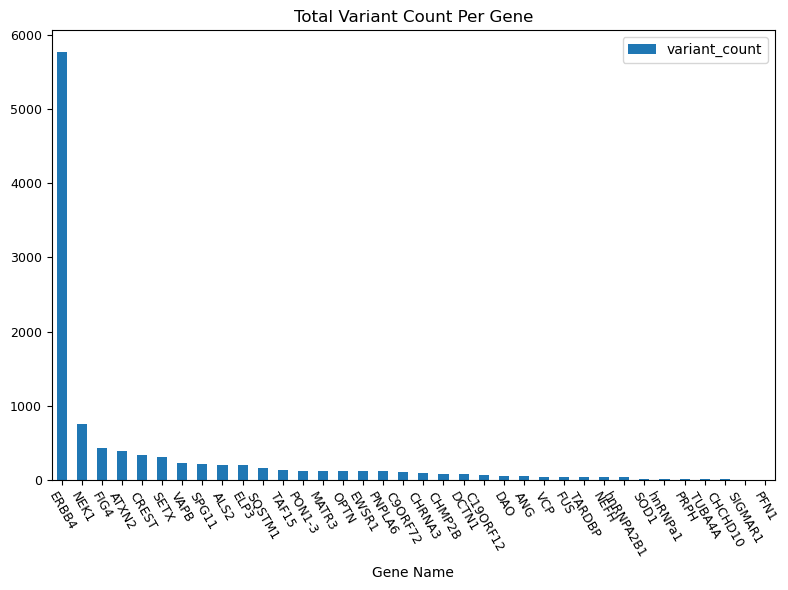

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'ATXN2', 'CREST']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,HG01506,956
1,HG01507,1363
2,HG01624,1511
3,HG01684,967
4,HG01709,1399


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1304.5046728971963), 227.1786502488767)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

18

In [39]:
len(bottom_genomes)

18

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,HG01506,HG01507,HG01624,HG01684,HG01709,HG01603,HG01704,HG01518,HG01503,HG01779,...,HG01771,HG01783,HG01680,HG01762,HG01765,HG02223,HG01623,HG01522,HG02219,HG01695
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,30,1,2,2,5,7,6,9,2,6,...,7,5,11,8,2,6,32,12,40,25
ANG,5,0,0,1,5,0,10,3,9,0,...,11,0,14,11,1,5,8,4,0,5
ATXN2,9,13,11,9,14,9,8,8,26,14,...,14,19,12,14,11,12,13,15,7,17
C19ORF12,7,12,7,5,11,6,9,16,7,7,...,12,15,7,16,8,9,11,8,11,6
C9ORF72,16,35,15,36,23,9,1,29,22,24,...,23,11,35,6,16,6,6,10,23,35


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,HG01603,HG01784,HG01699,HG01606,HG01509,HG01773,HG01536,HG01708,HG01519,HG01619,HG01626,HG01768,HG01513,HG01537,HG01678,HG01530,HG01501,HG01613
gene,,,,,,,,,,,,,,,,,,
ERBB4,1016,1008,1176,1094,1225,983,1212,1174,1008,1308,938,1118,1003,1222,1153,1145,1184,994
NEK1,195,196,231,50,4,216,45,46,189,6,195,13,192,11,7,223,9,230
FIG4,39,36,21,69,24,34,51,57,50,5,63,51,38,48,53,41,38,21
ATXN2,9,12,8,11,15,13,22,13,12,12,15,16,21,9,8,16,9,14
CREST,4,31,5,2,3,89,3,80,6,5,0,83,4,4,83,5,32,5


In [46]:
tgdf_bot_genomes.head()

,HG01506,HG01684,HG01518,HG01779,HG01631,HG01672,HG01620,HG01697,HG01615,HG01786,HG02220,HG01515,HG02221,HG02236,HG01673,HG01617,HG01669,HG01765
gene,,,,,,,,,,,,,,,,,,
ERBB4,579,665,709,666,408,344,506,694,591,606,610,646,482,360,385,578,570,724
NEK1,46,11,48,45,5,42,29,13,12,47,44,42,49,191,13,44,27,26
FIG4,36,39,7,55,55,36,54,18,49,75,34,19,26,41,36,36,38,33
ATXN2,9,9,8,14,10,9,9,15,7,10,10,8,9,11,8,7,10,11
CREST,1,5,4,33,6,5,3,6,58,3,4,1,78,3,4,5,5,4


## Plot stacked bar chart for top genes & top genomes

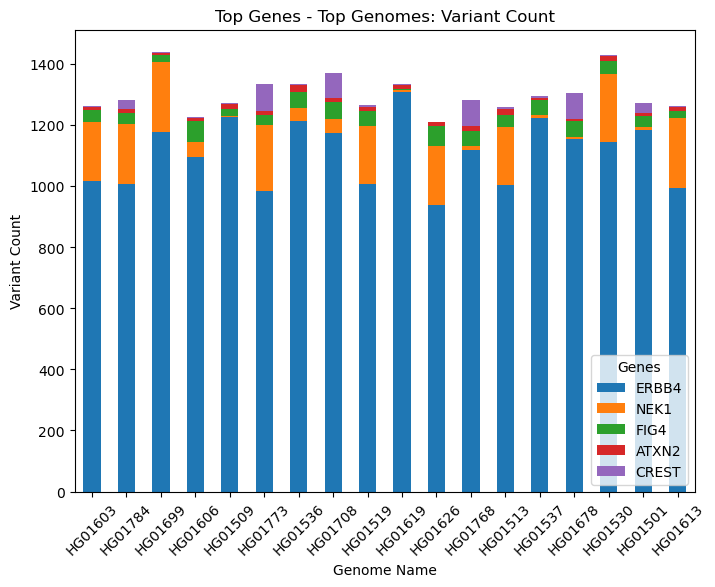

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

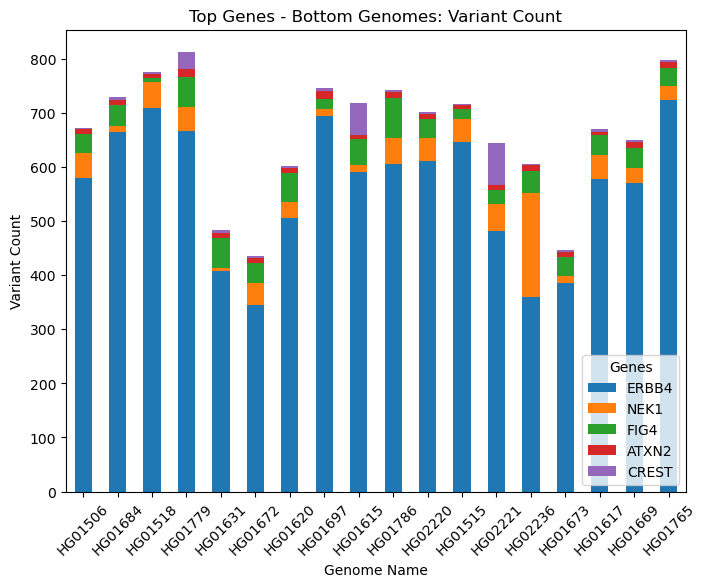

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()